In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4' 

import deepchem as dc
import pandas as pd
import pickle
import numpy as np
import warnings
import matplotlib.pyplot as plt
from utils import *
warnings.filterwarnings('ignore')
cols = ['compound id (and file prefix)','SMILES','experimental value (kcal/mol)','experimental uncertainty (kcal/mol)','has_uncertainty','relative_uncertainty']
freesolv = pd.read_csv('dicts/database.txt',sep='; ')
# freesolv['uncertainty'] = ~freesolv['text notes.'].str.contains('Experimental uncertainty not presently available, so assigned a default value')#.astype(int)+2
freesolv['has_uncertainty'] = ~(freesolv['text notes.'].str.contains('default'))
freesolv['relative_uncertainty'] = abs(freesolv['experimental uncertainty (kcal/mol)'] / freesolv['experimental value (kcal/mol)'])
# freesolv[(abs(freesolv['experimental value (kcal/mol)'])>1) & (freesolv.has_uncertainty == 1)].describe()
freesolv[(abs(freesolv['experimental value (kcal/mol)'])>=1)].describe()


,experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),relative_uncertainty
count,553.000000,553.000000,553.000000,553.000000,553.000000
mean,-4.371863,0.569150,-4.096275,0.031284,0.169057
std,3.848676,0.325268,4.188449,0.009088,0.129540
min,-25.470000,0.030000,-21.760000,0.010000,0.008638
25%,-6.160000,0.600000,-5.830000,0.030000,0.078227
50%,-4.090000,0.600000,-3.340000,0.030000,0.135440
75%,-2.370000,0.600000,-1.830000,0.030000,0.234375
max,3.430000,1.930000,3.330000,0.090000,0.594059


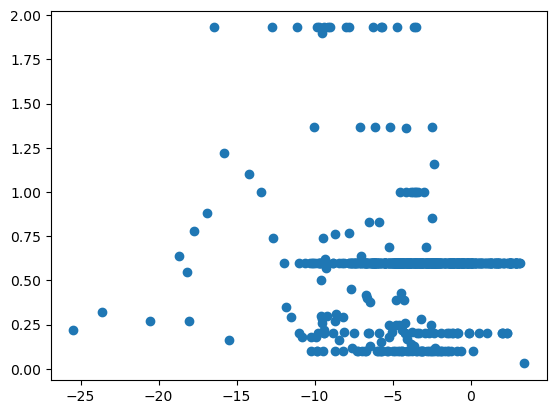

In [57]:
plt.scatter(freesolv['experimental value (kcal/mol)'],freesolv['experimental uncertainty (kcal/mol)'])

In [52]:
freesolv[cols][(freesolv['experimental uncertainty (kcal/mol)'] > 0.6)].sort_values(['relative_uncertainty'],ascending=False)#.describe()

,compound id (and file prefix),SMILES,experimental value (kcal/mol),experimental uncertainty (kcal/mol),has_uncertainty,relative_uncertainty
132,mobley_2501588,CCC[N@@](CC1CC1)c2c(cc(cc2[N+](=O)[O-])C(F)(F)...,-2.45,1.37,False,0.559184
511,mobley_7829570,CCCC[N@](CC)c1c(cc(cc1[N+](=O)[O-])C(F)(F)F)[N...,-3.51,1.93,False,0.549858
23,mobley_1352110,CCCCN(CC)C(=O)SCCC,-3.64,1.93,False,0.530220
301,mobley_4845722,c1(c(c(c(c(c1Cl)Cl)Cl)Cl)Cl)Cl,-2.33,1.16,False,0.497854
630,mobley_9740891,c1cc(c(c(c1)Cl)C#N)Cl,-4.71,1.93,False,0.409766
447,mobley_6935906,CC(=CCC[C@](C)(C=C)OC(=O)C)C,-2.49,0.85,False,0.341365
320,mobley_5076071,CCN(CC)c1c(cc(c(c1[N+](=O)[O-])N)C(F)(F)F)[N+]...,-5.66,1.93,False,0.340989
134,mobley_2518989,CCOP(=S)(OCC)S[C@@H](CCl)N1C(=O)c2ccccc2C1=O,-5.74,1.93,True,0.336237
344,mobley_5456566,c1(c(c(c(c(c1Cl)Cl)Cl)Cl)Cl)c2c(c(c(c(c2Cl)Cl)...,-2.98,1.00,False,0.335570
562,mobley_8713762,CCCN(CCC)C(=O)SCCC,-4.13,1.36,False,0.329298


In [9]:
freesolv.describe()

,experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),relative_uncertainty
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,-3.803006,0.567352,-3.486059,0.030327,inf
std,3.847820,0.305828,4.186344,0.009027,NaN
min,-25.470000,0.030000,-21.760000,0.010000,0.008638
25%,-5.727500,0.600000,-5.425000,0.030000,0.087282
50%,-3.530000,0.600000,-3.050000,0.030000,0.154639
75%,-1.215000,0.600000,-0.482500,0.030000,0.300758
max,3.430000,1.930000,3.330000,0.090000,inf


In [39]:
# freesolv[(freesolv.uncertainty == 1)]['experimental uncertainty (kcal/mol)'].value_counts()
freesolv[(freesolv.uncertainty == 1)].describe()

,experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol)
count,59.000000,59.000000,59.000000,59.000000
mean,-2.760169,0.478305,-2.697458,0.029492
std,3.770399,0.414463,4.986616,0.010574
min,-11.000000,0.100000,-17.240000,0.010000
25%,-4.565000,0.200000,-3.710000,0.020000
50%,-2.700000,0.600000,-1.980000,0.030000
75%,-0.050000,0.600000,0.975000,0.030000
max,2.970000,1.930000,3.030000,0.070000


In [8]:
# freesolv[(freesolv.uncertainty == 0)]['experimental uncertainty (kcal/mol)'].value_counts()
freesolv[(freesolv.uncertainty == 0)].describe()

AttributeError: 'DataFrame' object has no attribute 'uncertainty'

In [38]:
freesolv[(freesolv['experimental uncertainty (kcal/mol)'] >= 1.0)&(freesolv.uncertainty == 0)].describe()

,experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol)
count,31.000000,31.000000,31.000000,31.000000
mean,-7.130645,1.493871,-7.071290,0.040968
std,4.163224,0.418479,5.223474,0.006509
min,-16.430000,1.000000,-16.040000,0.030000
25%,-9.690000,1.000000,-11.530000,0.040000
50%,-5.660000,1.370000,-5.380000,0.040000
75%,-3.675000,1.930000,-2.425000,0.040000
max,-2.330000,1.930000,0.760000,0.060000


In [2]:
freesolv[(freesolv['experimental value (kcal/mol)'] > -11.99)].describe()

,experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),relative_uncertainty
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,-3.479378,0.561770,-3.181132,0.030000,inf
std,3.218795,0.295386,3.714369,0.008365,NaN
min,-11.950000,0.030000,-17.240000,0.010000,0.008746
25%,-5.485000,0.600000,-5.205000,0.030000,0.090634
50%,-3.450000,0.600000,-3.000000,0.030000,0.160858
75%,-1.165000,0.600000,-0.450000,0.030000,0.311146
max,3.430000,1.930000,3.330000,0.070000,inf


In [52]:
amino_analogues = ['methane','propane','isobutane','n-butane','methanol','ethanol','methanethiol','methyl ethyl sulfide',
                   'acetamide','propionamide','toluene','p-cresol','1-methylimidazole','methylindole']
freesolv[(freesolv['iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)'].isin(amino_analogues))]
#not found: methyl ethyl sulfide, methylindole

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.,uncertainty
37,mobley_1636752,CO,methanol,-5.10,0.6,-3.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,False
66,mobley_1873346,Cc1ccccc1,toluene,-0.90,0.2,-0.79,0.03,10.1039/P29900000291,10.1021/acs.jced.7b00104,Experimental uncertainty as suggested by 10.10...,True
76,mobley_1923244,CCCC,n-butane,2.10,0.2,2.59,0.02,10.1039/P29900000291,10.1021/acs.jced.7b00104,Experimental uncertainty as suggested by 10.10...,True
93,mobley_2068538,CCC,propane,2.00,0.2,2.50,0.02,10.1039/P29900000291,10.1021/acs.jced.7b00104,Experimental uncertainty as suggested by 10.10...,True
112,mobley_2310185,CCO,ethanol,-5.00,0.6,-3.39,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,False
168,mobley_2925352,Cc1ccc(cc1)O,p-cresol,-6.13,0.6,-5.58,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,False
326,mobley_5157661,CC(C)C,isobutane,2.30,0.2,2.54,0.02,10.1039/P29900000291,10.1021/acs.jced.7b00104,Experimental uncertainty as suggested by 10.10...,True
329,mobley_525934,CS,methanethiol,-1.20,0.2,-0.27,0.02,10.1039/P29900000291,10.1021/acs.jced.7b00104,Experimental uncertainty as suggested by 10.10...,True
349,mobley_5499659,Cn1ccnc1,1-methylimidazole,-8.41,0.6,-6.28,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,False
524,mobley_8048190,CC(=O)N,acetamide,-9.71,0.6,-8.82,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,False
